In [22]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from scipy.stats import norm

In [23]:
def get_W_witness(P, Q):
    n = len(P)
    X = np.concatenate([P, Q], axis=0)
    c = np.array(n*[-1/n] + n*[1/n])
    A_ub, b_ub = [], []
    for i in range(2*n):
        for j in range(2*n):
            if i == j:
                continue
            z = np.zeros(2*n)
            z[i] = 1
            z[j] = -1
            A_ub.append(z)
            b_ub.append(np.abs(X[i] - X[j]))
    res = linprog(c=c, A_ub=A_ub, b_ub=b_ub)
    a = res['x']
    W_f_witness = lambda alpha, x: alpha*np.min(a + np.abs(x - X)) + (1 - alpha) * np.max(a - np.abs(x - X))    
    return W_f_witness

In [24]:
def rq(x, y):
    return (1 + 3*(x-y)**2)**(-2)

def get_MMD_witness(P, Q, kernel=rq):
    n = len(P)
    MMD_f_witness = lambda x: np.mean(kernel(x, P)) - np.mean(kernel(x, Q))
    return MMD_f_witness

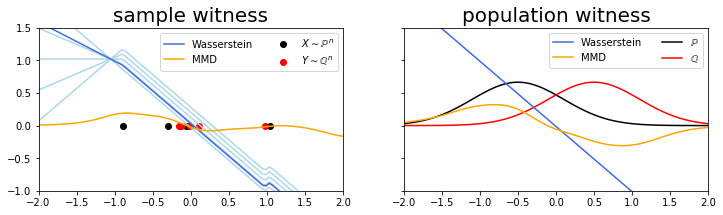

In [45]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,3))
xx = np.linspace(-2, 2, 100)
for n, ax in zip([6, 70], axes):
    P = np.random.normal(loc=-.5, scale=.6, size=n)
    Q = np.random.normal(loc=.5, scale=.6, size=n)
    if n < 20:
        ax.scatter(P, np.zeros(n), color='black', label='$X\sim\mathbb{P}^n$')
        ax.scatter(Q, np.zeros(n), color='red', label='$Y\sim \mathbb{Q}^n$')
    else:
        ax.plot(xx, [norm.pdf(x, loc=-.5, scale=.6) for x in xx], color='black', ls='-', label='$\mathbb{P}$')
        ax.plot(xx, [norm.pdf(x, loc=.5, scale=.6) for x in xx], color='red', ls='-', label='$\mathbb{Q}$')
#         Q[-1] = 2.1
#         P[1] = -2.1

    W_f_witness = get_W_witness(P, Q)
    MMD_f_witness = get_MMD_witness(P, Q)
    if n < 20:
        for j in range(5):
            W_witness = np.array([W_f_witness(j/4., x) for x in xx])
            W_witness -= W_witness.mean() 
            ax.plot(xx, W_witness, color='lightblue')
    W_witness = np.array([W_f_witness(.8, x) for x in xx[-1::-((n>20)*3 + 1)]])
    W_witness -= W_witness.mean() 
    MMD_witness = np.array([MMD_f_witness(x) for x in xx])
    
    ax.plot(xx[-1::-((n>20)*3 + 1)], W_witness, color='royalblue', label='Wasserstein')
    ax.plot(xx, MMD_witness, color='orange', label='MMD')
    ax.set_ylim(-1., 1.5)
    ax.set_xlim(-2., 2.)
    if n < 20:
        ax.legend(loc=1, ncol=2)
    else:
        handles, labels = plt.gca().get_legend_handles_labels()
        order = [2, 3, 0, 1]
        plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=1, ncol=2)
axes[0].set_title('sample witness', fontsize=20)
axes[1].set_title('population witness', fontsize=20)
plt.show()

In [42]:
fig.savefig('witness10.pdf')

In [ ]:
max([])